# Author: Midrar Adham
## Corner Reliability & project Proposal

In [1]:
import os
import sys
import random
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

**Select a set of 5-10 images. Convert them to grayscale and show them**
---

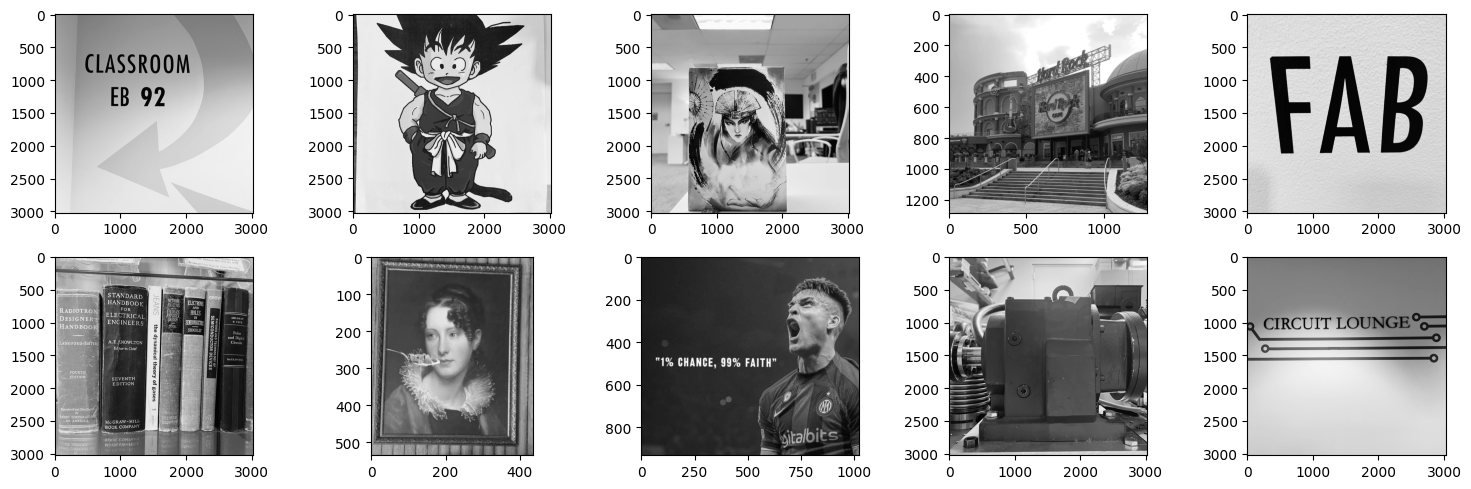

In [2]:
dir = '../../sample_data/hw6_images_2/'
images = os.listdir(dir)

_, ax = plt.subplots(2, 5, figsize=(15, 5))
ax = ax.flatten()
for img, ax in zip(images, ax):
    img = cv.imread(dir + img, cv.IMREAD_GRAYSCALE)
    ax.imshow(img, cmap='gray')

plt.tight_layout()



**Develop a means of transforming images using a perspective transform such that if the image were taken 5 meters away, the transformed image is taken with an equivalent of a camera location that has changed position according to a 3D gaussian distribution with a standard deviation of 1 meter and has changed its orientation by rotation along a random axis by an angle randomly chosen from a uniform distribution ranging from 0 to 10 degrees. Also randomly alter the scale of the image intensity with a uniform distribution of 0.95 to 1.05 and the brightness by -0.10 to 0.10. Show a selection of 10 examples of randomly selected images before and after the transform.**
---

In [3]:
def scale_img (img):
    pass

def rotate_images(img, directory):
    
    image = cv.imread(directory + img, cv.IMREAD_GRAYSCALE)
    std_dev = 1
    k = 250
    pos_1 = np.random.randint(0, k, 2)
    pos_2 = np.random.randint(0, k, 2)
    pos_3 = np.random.randint(0, k, 2)
    pos_4 = np.random.randint(0, k, 2)
    angle = random.randint(-10, 10)

    # Initialize the rotation matrix
    rotation_matrix = cv.getRotationMatrix2D(center = (image.shape[1] / 2, image.shape[0] / 2), angle=angle, scale=1)
    # Add a third row for the rotation matrix so considering homogensous coordinates
    rotation_matrix = np.vstack([rotation_matrix, [0, 0, 1]])
    # Apply rotation to image
    rotated_image = cv.warpPerspective(image, rotation_matrix, (image.shape[1], image.shape[0]))
    # Define the image corners after rotation (Not really doing what it's supposed to do, change later if there is time)
    corner_1 = np.float32([0,0])
    corner_2 = np.float32([0, rotated_image.shape[1]-1])
    corner_3 = np.float32([rotated_image.shape[0]-1,rotated_image.shape[1]-1])
    corner_4 = np.float32([rotated_image.shape[0]-1, 0])

    # Define the source and destination points (Similar to Dr. McNames code)
    src_points = np.float32([corner_1, corner_2, corner_3, corner_4])
    dst_points = np.float32([corner_1 + pos_1, corner_2 + [pos_2[0], pos_2[1] - k], corner_3 + pos_3 - k, corner_4 + [pos_4[0] - k, pos_4[1]]])

    # Get the projective matrix
    projective_matrix = cv.getPerspectiveTransform(src_points, dst_points)
    warped_image = cv.warpPerspective(image, projective_matrix, (image.shape[1], image.shape[0]), borderMode=cv.BORDER_REPLICATE)
    
    return image, warped_image

# dir = '../../sample_data/hw6_images_2/'
# orig, rotated = rotate_images(img='lauti.JPG', directory=dir)
# fig, ax = plt.subplots(1, 2, figsize=(15, 5))
# ax[0].imshow(orig, cmap='gray')
# ax[1].imshow(rotated, cmap='gray')


**Apply the Harris corner detector to both images. Indicate the 20 most prominent features on the original image. Also indicate where you would expect the 20 most prominent features to occur in the transformed image. Finally, show the 20 most prominent features detected in the transformed image. Show 10 examples of randomly selected and transformed image pairs.**
---

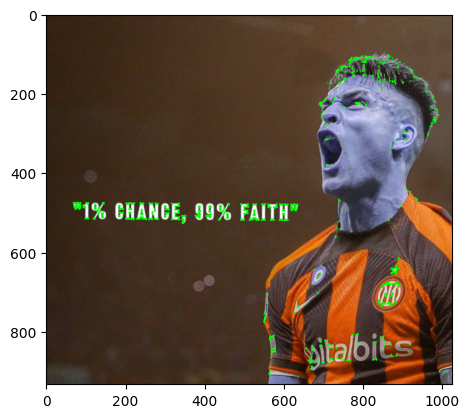

In [4]:
def harrisCorner():
    img = cv.imread("../../sample_data/hw6_images_2/lauti.JPG")

    # cv.imshow("Original Image", img)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # cornerHarris takes gray image in form of float32
    gray = np.float32(gray)
    dst = cv.cornerHarris(gray, 3, 3, 0.04)
    '''
            Parameters
            ----------
    1.) img - Input image, it should be grayScale
                and float32 type.
    2.) blockSize - It is the size of neighbourhood
                    considered for corner detection.
    3.) ksize - Aperture parameter of Sobel derivative
                used.
    4.) k - Harris detector free parameter in the 
            equation.
    '''

    dst = cv.dilate(dst, None)

    img[dst > 0.01 * dst.max()] = [0, 255, 0]
    plt.imshow(img, cmap='gray')


harrisCorner()

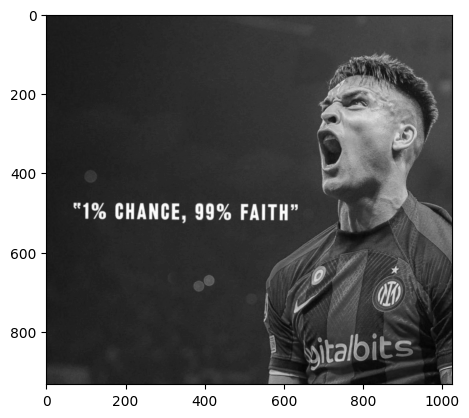

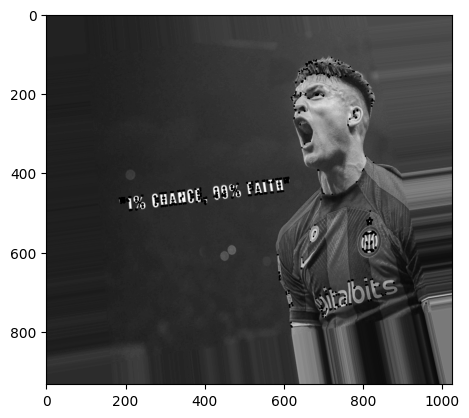

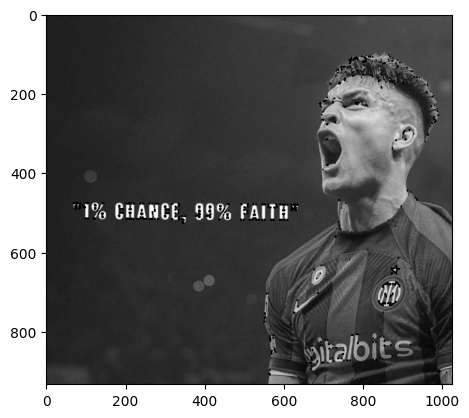

In [5]:
def harris_corner(gray):
    gray = np.float32(gray)
    dst = cv.cornerHarris(src=gray,blockSize=3,ksize=3,k=0.04)
    dst = cv.dilate(dst, None)
    gray[dst > 0.01 * dst.max()] = 0
    return gray

# img = cv.imread("../../sample_data/hw6_images_2/lauti.JPG")
orig, rotat = rotate_images('lauti.JPG', dir)
# gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(orig, cmap='gray')
plt.show()
img_harris = harris_corner(gray=rotat)
orig_harris = harris_corner(gray=orig)
plt.imshow(img_harris, cmap='gray')
plt.show()
plt.imshow(orig_harris, cmap='gray')
plt.show()